<a href="https://colab.research.google.com/github/rebran12/TugasPhython/blob/main/Tugas_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [48]:
ls

'1101140334 REBRAN NATANAEL NO2 TT-41-06.pdf'
'1101140334 REBRAN NATANAEL NO3 DAN 1 TT-41-06.pdf'
'1101140334 REBRAN NATANAEL NO4 TT-41-06.pdf'
 15876773504781491504349875897728.jpg
 3scene@
'[AnimeHADE.Com] KnNwBD_Mkv1080p.mkv'
'Avengers: Infinity War 2018 (1080p | 299536)'
'Avengers: Infinity War 2018 (1080p | 299536) (1)'
'Avengers: Infinity War 2018 (1080p | 299536) (2)'
'Avengers: Infinity War 2018 (1080p | 299536) (3)'
'Avengers: Infinity War 2018 (1080p | 299536) (4)'
 Classroom/
'Colab Notebooks'/
 EKTEK/
'File FATHER'/
'File UDA'/
'Getting started.pdf'
 Im.Not.Ashamed.2016.720p.mp4
'Ipeenk Files'/
'Materi Kuliah'/
 nnmodel_scene/
'Program Tambahan'/
'Project Ka Angel'/
 Semarang/
'Semarang 2'/
 The_Big_Bang_Theory_-_Season_12_Ep_14
 The_Twilight_Saga:_New_Moon_2009_1080p_18239


In [49]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [50]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [51]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [52]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [53]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [54]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [55]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [65]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(400, activation="relu", name="layer1"),
        Dense(40, activation="relu", name="layer2"),
        Dense(40, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 400)               4915600   
_________________________________________________________________
layer2 (Dense)               (None, 40)                16040     
_________________________________________________________________
layer3 (Dense)               (None, 40)                1640      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 123       
Total params: 4,933,403
Trainable params: 4,933,403
Non-trainable params: 0
_________________________________________________________________


In [67]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 1s 42ms/step - loss: 2.2856 - accuracy: 0.3868 - val_loss: 0.9102 - val_accuracy: 0.5907
Epoch 2/25
23/23 [==============================] - 1s 36ms/step - loss: 0.9420 - accuracy: 0.5992 - val_loss: 0.8452 - val_accuracy: 0.6582
Epoch 3/25
23/23 [==============================] - 1s 35ms/step - loss: 0.7997 - accuracy: 0.6456 - val_loss: 0.7549 - val_accuracy: 0.6498
Epoch 4/25
23/23 [==============================] - 1s 36ms/step - loss: 0.8515 - accuracy: 0.6301 - val_loss: 0.8889 - val_accuracy: 0.6034
Epoch 5/25
23/23 [==============================] - 1s 36ms/step - loss: 0.7100 - accuracy: 0.6934 - val_loss: 0.8312 - val_accuracy: 0.6667
Epoch 6/25
23/23 [==============================] - 1s 36ms/step - loss: 0.6822 - accuracy: 0.6934 - val_loss: 0.8569 - val_accuracy: 0.6624
Epoch 7/25
23/23 [==============================] - 1s 36ms/step - loss: 0.6597 - accuracy: 0.7356 - val_loss: 0.7649 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


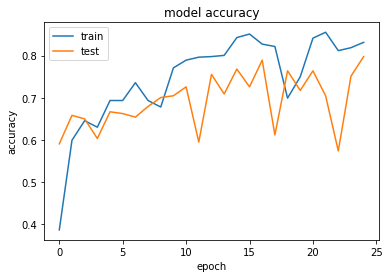

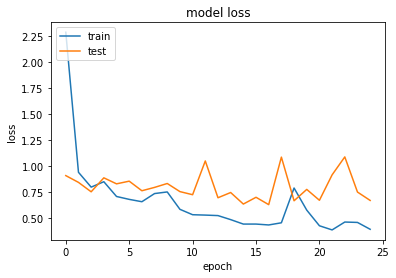

In [68]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.81      0.84      0.82        87
      forest       0.73      0.88      0.80        73
     highway       0.88      0.68      0.76        77

    accuracy                           0.80       237
   macro avg       0.81      0.80      0.79       237
weighted avg       0.81      0.80      0.80       237



In [70]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [71]:
import cv2
import matplotlib.pyplot as plt
image1='highway.jpg'

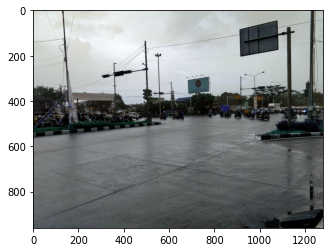

In [72]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [73]:
image_testing = Image.open('highway.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [74]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [75]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.3682716  0.03486329 0.59686506]]
['highway']
